# The Battle of the Neighborhoods - Week 1

## Introduction & Business Problem 

#### 1. Problem Background

Paris is the French capital and most interesting city of France. There are 2 140 526 residents (official estimate, 1 January 2019) in an area of 105 square kilometres (41 square miles).

In addition, Paris Region, also called as Île-de-France, includes the City of Paris which is the centre and seat of goverment. Île-de-France is located in the north-central region of France. It is the most populous of the 18 regions of France. It covers about 12 012 square kilometres (about 4638 square miles), about 2% of French territory. However, its population is about 12 213 364 (about 18.2% of french population) and it contributes nearly 30% of GDP in France.

According to the Economist Intelligence Unit Worldwide Cost of Living Survey in 2018, Paris was the second most expensive city in the world, after Singapore, and ahead of Zürich, Hong Kong, Oslo and Geneva. Another source ranked Paris as most expensive, on a par with Singapore and Hong Kong, in 2018.

Normally, we call the City of Paris as Paris and Paris Region as Île-de-France.

In this assignment, we want to find the good district from 20 districts to open an **Italian Restaurant** in Paris, France.

Indeed, in Paris, it is not limited in the Parisian cuisine to beef and escargots bourguignon. There are over 160 000 Italian people in the french capital where the tourists could sample several Italian specialties.

As you see from the above figures, Paris is one of the most interesting city to open Italian restaurant.

Concerning to the investors, we expect from them to prefer the districts in which there are the good community of the Italian restaurant and the type of business they want to install is less intense.

If we think about the venues restaurant, they could want to choose the neighborhood district where some Italian restaurants are opened.

#### 2. Problem Description

The problem could be divided in 4 main steps :

    1.Firstly, we build the Paris neighborhood data (Postcode, Neighborhood). 
    
    2.Secondly, we build the coordinates of all districts in Paris, France.

    3.Thirdly, we need to explore, segment and using KMeans to cluster the neighborhoods in the city of Paris based on the top 10 venues for each neighborhood district.

    4.Finally, we analyze the clustering result and then propose some suggestion location (district) to open Italian Restaurant in Paris. Then, we give some perspectives to enhance the performances

#### 3. Data Settings

To explore our problem, we need build Paris neighborhood data and their coordinates. 

+ Concerning to Paris neighborhood data, we use the following references:
    - Paris Arrondissements & Neighborhoods Map (https://parismap360.com/paris-arrondissement-map#.XfVpqtEo91l)
    - Arrondissements in Paris, France (https://francetravelplanner.com/go/paris/areas/arrondismt.html)

+ Concerning to relative coordinates (latitude, longitude) of each district in Paris
    - Using package geopy to convert an address into latitude and longitude values.

In [1]:
# Import Libraries
import os
import pandas as pd

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

In [2]:
COL_NAME_POSTCODE = "postcode"
COL_NAME_COUNTRY = "country"
COL_NAME_ADDRESS = "address"
COL_NAME_LOCATION = "location"
COL_NAME_POINT = "point"
COL_NAME_LATITUDE = "latitude"
COL_NAME_LONGITUDE = "longitude"
COL_NAME_ALTITUDE = "altitude"
COL_NAME_NEIGHBOURHOOD = "neighbourhood"

file_coordinate_path = "./var/Geospatial_Coordinates_Paris.csv"
file_neighbourhood_path = "./var/Paris_Neighbourhood.csv"

## Building the Paris neighborhood data

In [3]:
#Creating new or Loading neighbourhood data of Paris from csv
if os.path.exists(file_neighbourhood_path):
    print("Loading Paris neighbourhood data from file : %s" % file_neighbourhood_path)
    df_neighbourhood = pd.read_csv(file_neighbourhood_path, header=0)
else:
    # The following neighbourhood data of Paris that I built based on the information in
    # https://parismap360.com/paris-arrondissement-map#.XfXp89Eo91m
    # https://francetravelplanner.com/go/paris/areas/arrondismt.html
    list_neighbourhood = [
    ["75001", "75002"], ["75001", "75003"], ["75001", "75004"], ["75001", "75005"], 
    ["75001", "75006"], ["75001", "75007"], ["75001", "75008"], ["75001", "75009"], 
    ["75002", "75001"], ["75002", "75003"], ["75002", "75009"], ["75002", "75010"],
    ["75003", "75001"], ["75003", "75002"], ["75003", "75004"], ["75003", "75010"],
    ["75003", "75011"], ["75004", "75001"], ["75004", "75003"], ["75004", "75005"],
    ["75004", "75006"], ["75004", "75011"], ["75004", "75012"], ["75005", "75001"],
    ["75005", "75004"], ["75005", "75006"], ["75005", "75012"], ["75005", "75013"],
    ["75005", "75014"], ["75006", "75001"], ["75006", "75004"], ["75006", "75005"],
    ["75006", "75007"], ["75006", "75014"], ["75006", "75015"], ["75007", "75001"],
    ["75007", "75006"], ["75007", "75008"], ["75007", "75015"], ["75007", "75016"],
    ["75008", "75001"], ["75008", "75007"], ["75008", "75009"], ["75008", "75016"],
    ["75008", "75017"], ["75008", "75018"], ["75009", "75001"], ["75009", "75002"],
    ["75009", "75008"], ["75009", "75010"], ["75009", "75017"], ["75009", "75018"],
    ["75010", "75002"], ["75010", "75003"], ["75010", "75009"], ["75010", "75011"],
    ["75010", "75018"], ["75010", "75019"], ["75010", "75020"], ["75011", "75003"],
    ["75011", "75004"], ["75011", "75010"], ["75011", "75012"], ["75011", "75019"],
    ["75011", "75020"], ["75012", "75004"], ["75012", "75005"], ["75012", "75011"],
    ["75012", "75013"], ["75012", "75020"], ["75013", "75005"], ["75013", "75012"],
    ["75013", "75014"], ["75014", "75005"], ["75014", "75006"], ["75014", "75013"],
    ["75014", "75015"], ["75015", "75006"], ["75015", "75007"], ["75015", "75014"],
    ["75015", "75016"], ["75016", "75007"], ["75016", "75008"], ["75016", "75015"],
    ["75016", "75017"], ["75017", "75008"], ["75017", "75009"], ["75017", "75016"],
    ["75017", "75018"], ["75018", "75008"], ["75018", "75009"], ["75018", "75010"],
    ["75018", "75017"], ["75018", "75019"], ["75019", "75010"], ["75019", "75011"],
    ["75019", "75018"], ["75019", "75020"], ["75020", "75010"], ["75020", "75011"],
    ["75020", "75012"], ["75020", "75019"]]

    df_neighbourhood = pd.DataFrame(data=list_neighbourhood, columns=[COL_NAME_POSTCODE, COL_NAME_NEIGHBOURHOOD])

    df_neighbourhood.to_csv(file_neighbourhood_path, header=True, index=False)

Loading Paris neighbourhood data from file : ./var/Paris_Neighbourhood.csv


### Combining the neighborhoods that have the same Postcode
In reality, one district of Paris has various neighbourhood. That's why we need to combine all of neighbourhood of each district of Paris.

In [4]:
# Quicky reviewing the information of dataframe
df_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   postcode       102 non-null    int64
 1   neighbourhood  102 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [5]:
### Convert into string all of values in dataframe
df_neighbourhood = df_neighbourhood.astype(str)

In [6]:
df_neighbourhood.shape

(102, 2)

In [7]:
df_combined = df_neighbourhood.groupby(by=[COL_NAME_POSTCODE]).agg(lambda x: ",".join(x)).reset_index()
df_combined

,postcode,neighbourhood
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009"
1,75002,"75001,75003,75009,75010"
2,75003,"75001,75002,75004,75010,75011"
3,75004,"75001,75003,75005,75006,75011,75012"
4,75005,"75001,75004,75006,75012,75013,75014"
5,75006,"75001,75004,75005,75007,75014,75015"
6,75007,"75001,75006,75008,75015,75016"
7,75008,"75001,75007,75009,75016,75017,75018"
8,75009,"75001,75002,75008,75010,75017,75018"
9,75010,"75002,75003,75009,75011,75018,75019,75020"


### Building the Coordinates of All Districts in Paris

In [8]:
if os.path.exists(file_coordinate_path):
    print("Loading file input : {}".format(file_coordinate_path))
    df_coordinates = pd.read_csv(file_coordinate_path, header=0)
else:
    # In Paris, France, there are 20 districts
    list_of_districts_in_Paris = ["750" + str(x).zfill(2) for x in range(1, 21)]
    
    # Create DataFrame with given list of districts of Paris
    df_coordinates = pd.DataFrame(data=list_of_districts_in_Paris, columns=[COL_NAME_POSTCODE])

    df_coordinates[COL_NAME_COUNTRY] = "FR"
    df_coordinates[COL_NAME_ADDRESS] = df_coordinates.apply(lambda row: str(row[COL_NAME_POSTCODE]) + ", " + row[COL_NAME_COUNTRY], axis=1)

    locator = Nominatim(user_agent="paris_explorer")

    # convenient function to delay between geocoding calls
    geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

    # create column "location"
    df_coordinates[COL_NAME_LOCATION] = df_coordinates[COL_NAME_ADDRESS].apply(geocode)

    # extract from location column to (longitude, latitude, altitude)  (returns tuple)
    df_coordinates[COL_NAME_POINT] = df_coordinates[COL_NAME_LOCATION].apply(lambda loc: tuple(loc.point) if loc else None)

    # split point column into latitude, longitude and altitude columns
    df_coordinates[[COL_NAME_LATITUDE, COL_NAME_LONGITUDE, COL_NAME_ALTITUDE]] = pd.DataFrame(df_coordinates[COL_NAME_POINT].tolist(), index=df_coordinates.index)
    
    # save to file csv
    df_coordinates.to_csv(file_coordinate_path, header=True, index=False)

Loading file input : ./var/Geospatial_Coordinates_Paris.csv


In [9]:
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   postcode   20 non-null     int64  
 1   country    20 non-null     object 
 2   address    20 non-null     object 
 3   location   20 non-null     object 
 4   point      20 non-null     object 
 5   latitude   20 non-null     float64
 6   longitude  20 non-null     float64
 7   altitude   20 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ KB


In [10]:
# Removing the useless columns
df_coordinates.drop([COL_NAME_COUNTRY, COL_NAME_POINT, COL_NAME_ALTITUDE, COL_NAME_LOCATION], axis=1, inplace=True)

In [11]:
# Converting postcode to string
df_coordinates[COL_NAME_POSTCODE] = df_coordinates[COL_NAME_POSTCODE].astype(str)
df_coordinates.head()

,postcode,address,latitude,longitude
0,75001,"75001, FR",48.863554,2.338856
1,75002,"75002, FR",48.867418,2.344256
2,75003,"75003, FR",48.862607,2.360211
3,75004,"75004, FR",48.856004,2.357028
4,75005,"75005, FR",48.852752,2.346343


#### Check if correct => test with 1st district

In [12]:
df_coordinates[df_coordinates[COL_NAME_POSTCODE]=="75001"]

,postcode,address,latitude,longitude
0,75001,"75001, FR",48.863554,2.338856


#### Merge 2 df

In [13]:
df_merged = pd.merge(df_combined, df_coordinates, 
                     left_on=COL_NAME_POSTCODE, right_on=COL_NAME_POSTCODE,
                     how="inner")
df_merged.head()
# NB : we perform an inner join on COL_NAME_POSTCODE which is in both df

,postcode,neighbourhood,address,latitude,longitude
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009","75001, FR",48.863554,2.338856
1,75002,"75001,75003,75009,75010","75002, FR",48.867418,2.344256
2,75003,"75001,75002,75004,75010,75011","75003, FR",48.862607,2.360211
3,75004,"75001,75003,75005,75006,75011,75012","75004, FR",48.856004,2.357028
4,75005,"75001,75004,75006,75012,75013,75014","75005, FR",48.852752,2.346343


In [14]:
df_merged.describe()

,latitude,longitude
count,20.000000,20.000000
mean,48.859848,2.342180
std,0.017770,0.031128
min,48.826997,2.273958
25%,48.853341,2.315255
50%,48.856565,2.344069
75%,48.873627,2.357824
max,48.893074,2.409257


In [15]:
print("(row, column) = %s" % str(df_merged.shape))

(row, column) = (20, 5)


## Exploring and clustering the neighborhoods in Paris

In [16]:
# Unique district
df_merged[COL_NAME_POSTCODE].unique()

array(['75001', '75002', '75003', '75004', '75005', '75006', '75007',
       '75008', '75009', '75010', '75011', '75012', '75013', '75014',
       '75015', '75016', '75017', '75018', '75019', '75020'], dtype=object)

In [17]:
print('The dataframe has {} district and {} neighborhoods.'.format(
      df_merged[COL_NAME_POSTCODE].nunique(),
      df_merged.shape[0]))

The dataframe has 20 district and 20 neighborhoods.


### Using geopy library to get the latitude and longitude values of Paris

In [18]:
# Get the coordinate of Paris, France
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# We define user_agent as paris_explorer
def get_latitude_longitude(address=""):
    if not address:
        return None, None
    
    geolocator = Nominatim(user_agent="paris_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return (latitude, longitude)

def get_latitude_longitude_paris_fr():
    address = 'Paris, FR'
    return get_latitude_longitude(address)

latitude, longitude = get_latitude_longitude_paris_fr()
print('The geograpical coordinate of Paris, FR are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris, FR are 48.8566969, 2.3514616.


### Map with 20 district layer 

In [19]:
import folium

# create map using latitude and longitude values
m = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district, neighborhood in zip(df_merged[COL_NAME_LATITUDE], 
                                            df_merged[COL_NAME_LONGITUDE], 
                                            df_merged[COL_NAME_POSTCODE], 
                                            df_merged[COL_NAME_NEIGHBOURHOOD]):
    label = 'District:{}, Neighbourhood:{}'.format(district, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(m)  
    
m

### Defining Foursquare Credentials and Version

In [57]:
CLIENT_ID = 'xx'     # Foursquare ID
CLIENT_SECRET = 'xx' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xx
CLIENT_SECRET:xx


#### Let's explore the first neighborhood in our dataframe

In [21]:
df_merged.loc[0, COL_NAME_NEIGHBOURHOOD]

'75002,75003,75004,75005,75006,75007,75008,75009'

In [22]:
# Get the neighborhood's latitude and longitude values.
neighborhood_latitude = df_merged.loc[0, COL_NAME_LATITUDE]   # neighborhood latitude value
neighborhood_longitude = df_merged.loc[0, COL_NAME_LONGITUDE] # neighborhood longitude value

neighborhood_name = df_merged.loc[0, COL_NAME_NEIGHBOURHOOD] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 75002,75003,75004,75005,75006,75007,75008,75009 are 48.8635535039561, 2.33885565919603.


Now, let's get the top 100 venues that are in "75002,75003,75004,75005,75006,75007,75008,75009" within a radius of 500 meters.
First, let's create the GET request URL. Name your URL url.

In [23]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZPWMZOZNHLQZPTE2GTUWJ1DEQ5VAQO01WAJDOFSKPD4KH4QO&client_secret=M2TSRY0TB1HT0MYGBKFBIFXUB2KRZC1PIFLPL5Y5LILSUAXV&v=20180604&ll=48.8635535039561,2.33885565919603&radius=500&limit=100'

Send the GET request and examine the results

In [24]:
import requests # library to handle requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '606aea20fa8fff3816db1a26'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Palais-Royal',
  'headerFullLocation': 'Palais-Royal, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 48.8680535084561,
    'lng': 2.345683312923939},
   'sw': {'lat': 48.859053499456095, 'lng': 2.332028005468121}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba8b650f964a520f5e839e3',
       'name': 'Jardin du Palais Royal',
       'location': {'address': 'Palais Royal',
        'lat': 48.86494061245833,
        'lng': 2.3377275466918945,
        'labeledLatLngs': [{'label': 'display',
          'lat':

Let's borrow the get_category_type function from the Foursquare lab

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [26]:
import pandas as pd

venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jardin du Palais Royal,Garden,48.864941,2.337728
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,Le Louis,French Restaurant,48.864331,2.341332
4,Le Pot de Vins,Restaurant,48.864322,2.340193


And how many venues were returned by Foursquare?

In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

85 venues were returned by Foursquare.


### Let's create a function to repeat the same process to all the neighborhoods

In [28]:
COL_NAME_VENUE = "Venue"
COL_NAME_CATEGORY = "Category"

COL_NAME_NEIGHBOURHOOD_LATITUDE = COL_NAME_NEIGHBOURHOOD + " " + COL_NAME_LATITUDE
COL_NAME_NEIGHBOURHOOD_LONGITUDE = COL_NAME_NEIGHBOURHOOD + " " + COL_NAME_LONGITUDE
COL_NAME_VENUE_LATITUDE = COL_NAME_VENUE + " " + COL_NAME_LATITUDE
COL_NAME_VENUE_LONGITUDE = COL_NAME_VENUE + " " + COL_NAME_LONGITUDE
COL_NAME_VENUE_CATEGORY = COL_NAME_VENUE + " " + COL_NAME_CATEGORY


def get_near_by_venues(names, latitudes, longitudes, radius=500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [COL_NAME_NEIGHBOURHOOD, 
                             COL_NAME_NEIGHBOURHOOD_LATITUDE,
                             COL_NAME_NEIGHBOURHOOD_LONGITUDE,
                             COL_NAME_VENUE,
                             COL_NAME_VENUE_LATITUDE,
                             COL_NAME_VENUE_LONGITUDE,
                             COL_NAME_VENUE_CATEGORY]
    return(nearby_venues)


In [29]:
### Getting dataframe that contains all the neighborhoods of Paris
venues_neighbourhoods = get_near_by_venues(
    names=df_merged[COL_NAME_NEIGHBOURHOOD],
    latitudes=df_merged[COL_NAME_LATITUDE],                           
    longitudes=df_merged[COL_NAME_LONGITUDE])

75002,75003,75004,75005,75006,75007,75008,75009
75001,75003,75009,75010
75001,75002,75004,75010,75011
75001,75003,75005,75006,75011,75012
75001,75004,75006,75012,75013,75014
75001,75004,75005,75007,75014,75015
75001,75006,75008,75015,75016
75001,75007,75009,75016,75017,75018
75001,75002,75008,75010,75017,75018
75002,75003,75009,75011,75018,75019,75020
75003,75004,75010,75012,75019,75020
75004,75005,75011,75013,75020
75005,75012,75014
75005,75006,75013,75015
75006,75007,75014,75016
75007,75008,75015,75017
75008,75009,75016,75018
75008,75009,75010,75017,75019
75010,75011,75018,75020
75010,75011,75012,75019


In [30]:
# Let's check the size of the resulting dataframe
print("(row, column) = %s" % str(venues_neighbourhoods.shape))
venues_neighbourhoods.head()

(row, column) = (1310, 7)


,neighbourhood,neighbourhood latitude,neighbourhood longitude,Venue,Venue latitude,Venue longitude,Venue Category
0,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Jardin du Palais Royal,48.864941,2.337728,Garden
1,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Palais Royal,48.863236,2.337127,Historic Site
2,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Comédie-Française,48.863088,2.336612,Theater
3,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Le Louis,48.864331,2.341332,French Restaurant
4,"75002,75003,75004,75005,75006,75007,75008,75009",48.863554,2.338856,Le Pot de Vins,48.864322,2.340193,Restaurant


In [31]:
# Let's check how many venues were returned for each neighborhood
venues_neighbourhoods.groupby(COL_NAME_NEIGHBOURHOOD).count()

,neighbourhood latitude,neighbourhood longitude,Venue,Venue latitude,Venue longitude,Venue Category
neighbourhood,,,,,,
"75001,75002,75004,75010,75011",77,77,77,77,77,77
"75001,75002,75008,75010,75017,75018",100,100,100,100,100,100
"75001,75003,75005,75006,75011,75012",100,100,100,100,100,100
"75001,75003,75009,75010",100,100,100,100,100,100
"75001,75004,75005,75007,75014,75015",100,100,100,100,100,100
"75001,75004,75006,75012,75013,75014",78,78,78,78,78,78
"75001,75006,75008,75015,75016",54,54,54,54,54,54
"75001,75007,75009,75016,75017,75018",38,38,38,38,38,38
"75002,75003,75004,75005,75006,75007,75008,75009",85,85,85,85,85,85


In [32]:
# Let's find out how many unique categories can be curated from all the returned venues
venues_neighbourhoods[COL_NAME_VENUE_CATEGORY].unique()

array(['Garden', 'Historic Site', 'Theater', 'French Restaurant',
       'Restaurant', 'Plaza', 'Hotel', 'Shoe Store', 'Cheese Shop', 'Spa',
       'Café', 'Clothing Store', 'Coffee Shop', 'Wine Shop',
       'Udon Restaurant', 'Art Museum', 'Chinese Restaurant',
       'Japanese Restaurant', 'Sandwich Place', 'Wine Bar',
       'Pedestrian Plaza', 'Cosmetics Shop', 'Tea Room', 'Bakery',
       'Exhibit', 'Italian Restaurant', 'Furniture / Home Store',
       'Cocktail Bar', 'Bubble Tea Shop', 'General College & University',
       'Brasserie', 'Thai Restaurant', 'Grocery Store', 'Perfume Shop',
       'Shopping Mall', 'Church', 'Ramen Restaurant',
       'Taiwanese Restaurant', 'Sushi Restaurant', 'Noodle House',
       'Pastry Shop', 'Bookstore', 'Herbs & Spices Store', 'Park',
       'Lebanese Restaurant', 'Salad Place', 'Dessert Shop', 'Beer Bar',
       'Music Store', 'Bistro', 'Greek Restaurant', 'Donut Shop',
       'Souvlaki Shop', 'Nightclub', 'Pizza Place', "Women's Store",
 

In [33]:
print('There are {} uniques categories.'.format(
    len(venues_neighbourhoods[COL_NAME_VENUE_CATEGORY].unique())))

There are 201 uniques categories.


### Analyzing Each Neighborhood District in Paris

In [34]:
# one hot encoding
df_onehot = pd.get_dummies(venues_neighbourhoods[[COL_NAME_VENUE_CATEGORY]], 
                                        prefix="", 
                                        prefix_sep="")

# add neighborhood column back to dataframe
df_onehot[COL_NAME_NEIGHBOURHOOD] = venues_neighbourhoods[COL_NAME_NEIGHBOURHOOD] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,neighbourhood,Adult Boutique,African Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"75002,75003,75004,75005,75006,75007,75008,75009",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_onehot.shape

(1310, 202)

In [36]:
# Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
df_grouped = df_onehot.groupby(COL_NAME_NEIGHBOURHOOD).mean().reset_index()
df_grouped.head()

,neighbourhood,Adult Boutique,African Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auvergne Restaurant,Bagel Shop,...,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"75001,75002,75004,75010,75011",0.00,0.00,0.0,0.038961,0.00,0.012987,0.00,0.00,0.0,...,0.00,0.0,0.0,0.012987,0.00,0.025974,0.038961,0.012987,0.00,0.00
1,"75001,75002,75008,75010,75017,75018",0.00,0.00,0.0,0.000000,0.00,0.000000,0.01,0.00,0.0,...,0.02,0.0,0.0,0.020000,0.01,0.010000,0.020000,0.000000,0.00,0.00
2,"75001,75003,75005,75006,75011,75012",0.01,0.01,0.0,0.020000,0.01,0.010000,0.00,0.00,0.0,...,0.00,0.0,0.0,0.000000,0.00,0.000000,0.030000,0.000000,0.00,0.00
3,"75001,75003,75009,75010",0.00,0.00,0.0,0.000000,0.00,0.000000,0.01,0.00,0.0,...,0.00,0.0,0.0,0.000000,0.00,0.000000,0.050000,0.010000,0.02,0.00
4,"75001,75004,75005,75007,75014,75015",0.00,0.01,0.0,0.000000,0.00,0.000000,0.00,0.01,0.0,...,0.00,0.0,0.0,0.000000,0.00,0.000000,0.020000,0.010000,0.00,0.01


In [37]:
print("(row, column) = %s" % str(df_grouped.shape))

(row, column) = (20, 202)


In [38]:
# Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5
COL_NAME_FREQUENCE = 'freq'

for hood in df_grouped[COL_NAME_NEIGHBOURHOOD]:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped[COL_NAME_NEIGHBOURHOOD] == hood].T.reset_index()
    temp.columns = [COL_NAME_VENUE, COL_NAME_FREQUENCE]
    temp = temp.iloc[1:]
    temp[COL_NAME_FREQUENCE] = temp[COL_NAME_FREQUENCE].astype(float)
    temp = temp.round({COL_NAME_FREQUENCE: 2})
    print(temp.sort_values(COL_NAME_FREQUENCE, ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----75001,75002,75004,75010,75011----
                 Venue  freq
0    French Restaurant  0.09
1          Coffee Shop  0.05
2  Japanese Restaurant  0.04
3         Gourmet Shop  0.04
4         Burger Joint  0.04


----75001,75002,75008,75010,75017,75018----
               Venue  freq
0  French Restaurant  0.19
1              Hotel  0.08
2       Cocktail Bar  0.05
3             Bakery  0.05
4             Bistro  0.04


----75001,75003,75005,75006,75011,75012----
               Venue  freq
0  French Restaurant  0.08
1     Clothing Store  0.06
2       Gourmet Shop  0.03
3              Plaza  0.03
4        Pastry Shop  0.03


----75001,75003,75009,75010----
               Venue  freq
0  French Restaurant  0.09
1             Bakery  0.06
2       Cocktail Bar  0.06
3           Wine Bar  0.05
4        Salad Place  0.04


----75001,75004,75005,75007,75014,75015----
                 Venue  freq
0    French Restaurant  0.09
1            Bookstore  0.06
2  Japanese Restaurant  0.03
3   Seafood Re

### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = [COL_NAME_NEIGHBOURHOOD]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted[COL_NAME_NEIGHBOURHOOD] = df_grouped[COL_NAME_NEIGHBOURHOOD]

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75001,75002,75004,75010,75011",French Restaurant,Coffee Shop,Japanese Restaurant,Gourmet Shop,Bookstore,Bistro,Sandwich Place,Italian Restaurant,Burger Joint,Wine Bar
1,"75001,75002,75008,75010,75017,75018",French Restaurant,Hotel,Cocktail Bar,Bakery,Bistro,Bar,Japanese Restaurant,Café,Lounge,Pizza Place
2,"75001,75003,75005,75006,75011,75012",French Restaurant,Clothing Store,Plaza,Hotel,Wine Bar,Ice Cream Shop,Gourmet Shop,Pastry Shop,Italian Restaurant,Furniture / Home Store
3,"75001,75003,75009,75010",French Restaurant,Cocktail Bar,Bakery,Wine Bar,Salad Place,Coffee Shop,Hotel,Thai Restaurant,Clothing Store,Pastry Shop
4,"75001,75004,75005,75007,75014,75015",French Restaurant,Bookstore,Japanese Restaurant,Plaza,Indie Movie Theater,Creperie,Tea Room,Hotel,Seafood Restaurant,Historic Site


### Determining the optimal number of clusters for k-means clustering
Purpose: Determine optimal k for method KMeans

The technique to determine K, the number of clusters, is called the elbow method.

In chart, we will plot:

values for K on the horizontal axis
the distortion or the inertia on the Y axis which described the values calculated by the cost function.
In order to determine the optimal number of clusters, we select the value of number of cluster at the "Elbow" in chart. Indeed, we choose the point whose distortion or inertia starts decreases in a linear fashion.

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

distortions = [] 
inertias = [] 
mapping_distortion = {} 
mapping_inertia = {} 
max_num_of_cluster = 16
list_of_num_of_cluster = range(1, max_num_of_cluster + 1)
X = df_grouped.drop(COL_NAME_NEIGHBOURHOOD, 1)

for k in list_of_num_of_cluster:
    #Building and fitting the model
    model = KMeans(n_clusters=k).fit(X)
    
    # Getting the distortion and inertia for each value of k
    tmp_distortion = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]
    tmp_inertia = model.inertia_
    
    distortions.append(tmp_distortion)
    inertias.append(tmp_inertia) 
  
    mapping_distortion[k] = tmp_distortion
    mapping_inertia[k] = tmp_inertia


In [42]:
# Using the different values of Distortion
for key,val in mapping_distortion.items(): 
    print(str(key)+' : '+str(val))

1 : 0.15218461096213814
2 : 0.1366640087025257
3 : 0.12413656947894107
4 : 0.11280685677649402
5 : 0.1045231921608932
6 : 0.10016132340264225
7 : 0.09003450840283742
8 : 0.0832801817096643
9 : 0.07410391640539435
10 : 0.06524040812934426
11 : 0.06072995414517005
12 : 0.05507564775850432
13 : 0.04817655074492753
14 : 0.03976070920121433
15 : 0.03169332555019555
16 : 0.025416821152303693


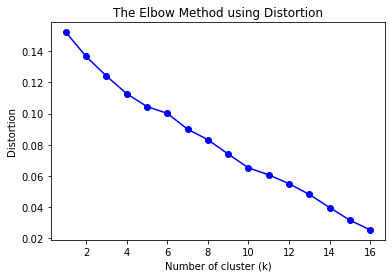

In [43]:
# Elbow curve
plt.plot(list_of_num_of_cluster, distortions, 'bo-') 
plt.xlabel('Number of cluster (k)') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [44]:
# Using the different values of Inertia
for key,val in mapping_inertia.items(): 
    print(str(key)+' : '+str(val))

1 : 0.4919262259790655
2 : 0.39532296991559374
3 : 0.3388811189782487
4 : 0.289293764264001
5 : 0.2644623329964173
6 : 0.2271144905606503
7 : 0.19382551644048776
8 : 0.17679552039063484
9 : 0.14782934372430165
10 : 0.13178140331519686
11 : 0.11477832654826767
12 : 0.09427498586222163
13 : 0.07789451374594716
14 : 0.06372923596816939
15 : 0.050712700173624364
16 : 0.0375104360618846


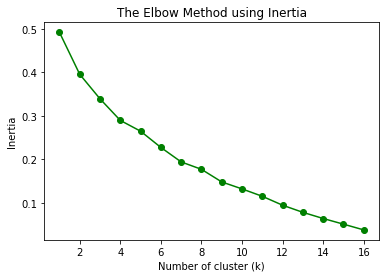

In [45]:
# Elbow curve using inertia
plt.plot(list_of_num_of_cluster, inertias, 'go-') 
plt.xlabel('Number of cluster (k)') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

As you see above charts of the Elbow Method using the distortion or the inertia, we conclude that the optimal number of clusters for our data corpus is 8.

### Result and Analysis
#### Clustering Neighborhoods of Paris, France
Run k-means to cluster the neighborhood into 6 clusters.

In [46]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 8

clustering_grouped_paris = df_grouped.drop(COL_NAME_NEIGHBOURHOOD, 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_grouped_paris)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 0, 0, 4, 1, 0, 1])

In [47]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
COL_NAME_CLUSTER_LABELS = 'Cluster Labels'

# add clustering labels
neighborhoods_venues_sorted.insert(0, COL_NAME_CLUSTER_LABELS, kmeans.labels_)

df_merged_paris = df_merged

df_merged_paris = df_merged_paris.join(neighborhoods_venues_sorted.set_index(COL_NAME_NEIGHBOURHOOD), 
                                                           on=COL_NAME_NEIGHBOURHOOD)

df_merged_paris.head() # check the last columns!

,postcode,neighbourhood,address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,75001,"75002,75003,75004,75005,75006,75007,75008,75009","75001, FR",48.863554,2.338856,0,French Restaurant,Japanese Restaurant,Plaza,Italian Restaurant,Historic Site,Hotel,Café,Thai Restaurant,Garden,Coffee Shop
1,75002,"75001,75003,75009,75010","75002, FR",48.867418,2.344256,0,French Restaurant,Cocktail Bar,Bakery,Wine Bar,Salad Place,Coffee Shop,Hotel,Thai Restaurant,Clothing Store,Pastry Shop
2,75003,"75001,75002,75004,75010,75011","75003, FR",48.862607,2.360211,0,French Restaurant,Coffee Shop,Japanese Restaurant,Gourmet Shop,Bookstore,Bistro,Sandwich Place,Italian Restaurant,Burger Joint,Wine Bar
3,75004,"75001,75003,75005,75006,75011,75012","75004, FR",48.856004,2.357028,0,French Restaurant,Clothing Store,Plaza,Hotel,Wine Bar,Ice Cream Shop,Gourmet Shop,Pastry Shop,Italian Restaurant,Furniture / Home Store
4,75005,"75001,75004,75006,75012,75013,75014","75005, FR",48.852752,2.346343,0,French Restaurant,Hotel,Coffee Shop,Indie Movie Theater,Plaza,Bookstore,Japanese Restaurant,Bar,Restaurant,Comic Shop


## Let's visualize the resulting clusters

In [48]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Let's get the geographical coordinates of Paris, France
latitude, longitude = get_latitude_longitude_paris_fr()
print('The geograpical coordinate of Paris, FR are {}, {}.'.format(latitude, longitude))
# ------------------------------------------------------------------------------------------------

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, district, poi, cluster in zip(df_merged_paris[COL_NAME_LATITUDE], 
                                  df_merged_paris[COL_NAME_LONGITUDE],
                                  df_merged_paris[COL_NAME_POSTCODE],
                                  df_merged_paris[COL_NAME_NEIGHBOURHOOD], 
                                  df_merged_paris[COL_NAME_CLUSTER_LABELS]):
    label = 'District:{}, Neighbourhood:{}, Number of Cluster:{}'.format(district, poi, cluster+1)
    label = folium.Popup(label,
                         parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Paris, FR are 48.8566969, 2.3514616.


### Examining Clusters
Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

Based on the defining categories, we can then assign a name to each cluster.

In [49]:
# Cluster 1
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 0, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75002,75003,75004,75005,75006,75007,75008,75009",0,French Restaurant,Japanese Restaurant,Plaza,Italian Restaurant,Historic Site,Hotel,Café,Thai Restaurant,Garden,Coffee Shop
1,"75001,75003,75009,75010",0,French Restaurant,Cocktail Bar,Bakery,Wine Bar,Salad Place,Coffee Shop,Hotel,Thai Restaurant,Clothing Store,Pastry Shop
2,"75001,75002,75004,75010,75011",0,French Restaurant,Coffee Shop,Japanese Restaurant,Gourmet Shop,Bookstore,Bistro,Sandwich Place,Italian Restaurant,Burger Joint,Wine Bar
3,"75001,75003,75005,75006,75011,75012",0,French Restaurant,Clothing Store,Plaza,Hotel,Wine Bar,Ice Cream Shop,Gourmet Shop,Pastry Shop,Italian Restaurant,Furniture / Home Store
4,"75001,75004,75006,75012,75013,75014",0,French Restaurant,Hotel,Coffee Shop,Indie Movie Theater,Plaza,Bookstore,Japanese Restaurant,Bar,Restaurant,Comic Shop
5,"75001,75004,75005,75007,75014,75015",0,French Restaurant,Bookstore,Japanese Restaurant,Plaza,Indie Movie Theater,Creperie,Tea Room,Hotel,Seafood Restaurant,Historic Site
10,"75003,75004,75010,75012,75019,75020",0,French Restaurant,Bar,Coffee Shop,Bistro,Bookstore,Italian Restaurant,Hotel,Pizza Place,Cocktail Bar,Pub


In [50]:
# Cluster 2
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 1, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"75001,75007,75009,75016,75017,75018",1,French Restaurant,Hotel,Bakery,Art Gallery,Corsican Restaurant,Spa,Hotel Bar,Grocery Store,Plaza,Park
8,"75001,75002,75008,75010,75017,75018",1,French Restaurant,Hotel,Cocktail Bar,Bakery,Bistro,Bar,Japanese Restaurant,Café,Lounge,Pizza Place
9,"75002,75003,75009,75011,75018,75019,75020",1,French Restaurant,Hotel,Restaurant,Japanese Restaurant,Coffee Shop,Indian Restaurant,Bakery,Gluten-free Restaurant,Bookstore,African Restaurant
14,"75006,75007,75014,75016",1,French Restaurant,Hotel,Bakery,Seafood Restaurant,Japanese Restaurant,Dessert Shop,Farmers Market,Coffee Shop,Indian Restaurant,Beer Store
15,"75007,75008,75015,75017",1,French Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Plaza,Seafood Restaurant,Train Station,Bar,Clothing Store,Food & Drink Shop
16,"75008,75009,75016,75018",1,Hotel,French Restaurant,Italian Restaurant,Bakery,Bar,Japanese Restaurant,Sushi Restaurant,Restaurant,Bistro,Diner


In [51]:
# Cluster 3
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 2, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"75005,75006,75013,75015",2,Supermarket,Bakery,Hotel,Café,Japanese Restaurant,Gym Pool,Diner,Farmers Market,Fast Food Restaurant,Flea Market


In [52]:
# Cluster 4
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 3, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,"75010,75011,75012,75019",3,Hotel,Music Venue,French Restaurant,Tram Station,Indian Restaurant,Tennis Court,Discount Store,Fast Food Restaurant,Brazilian Restaurant,Stadium


In [53]:
# Cluster 5
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 4, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"75001,75006,75008,75015,75016",4,French Restaurant,Hotel,Plaza,Café,Italian Restaurant,History Museum,Garden,Art Museum,Bistro,Historic Site


In [54]:
# Cluster 6
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 5, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"75004,75005,75011,75013,75020",5,French Restaurant,Hotel,Beer Garden,Skate Park,Brasserie,Coffee Shop,Lounge,Boat or Ferry,Beer Bar,Road


In [55]:
# Cluster 7
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 6, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"75010,75011,75018,75020",6,French Restaurant,Bistro,Bar,Pool,Park,Restaurant,Café,Gas Station,Brasserie,Metro Station


In [56]:
# Cluster 8
df_merged_paris.loc[df_merged_paris[COL_NAME_CLUSTER_LABELS] == 7, 
                    df_merged_paris.columns[[1] + list(range(5, df_merged_paris.shape[1]))]]

,neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"75005,75012,75014",7,French Restaurant,Vietnamese Restaurant,Bar,Bakery,Hotel,Thai Restaurant,Bistro,Japanese Restaurant,Italian Restaurant,Asian Restaurant
17,"75008,75009,75010,75017,75019",7,French Restaurant,Bar,Hotel,Café,Restaurant,Deli / Bodega,Supermarket,Italian Restaurant,Pizza Place,Gastropub


### Conclusion and Perspective
#### Conclusion

In above result, we have the clustering result of the various districts based on top 10 venues for each neighborhood.

Thus, as you see, the French Restaurant is the first most common venue in most of districts in Paris.

When reviewing the clusters, we could see that the Italian restaurant is present in several cluster:  1,2, 5 and 8. It is rated second in cluster 2, especially district 17.

So, depending on the several requirements of the investors, if we would like to open new Italian restaurant in the district that have already had many Italian restaurant, we should open in District 15.


#### Perspectives
Concerning to enhance the features of district, we should add more relevant features for each district such as:

- the transport info (public transport, parking, etc.),
- the information of italian communities,
- the information of major tourist venues
- the number of families as italian restaurant are a typical menu for french family

Concerning to clustering methods and enhancing the performances, we could do some experiments with other algorithms, for instance,

- Fuzzy c-means method
- DBSCAN: Density-based clustering
- Hierarchical K-Means Clustering
- HCPC: Hierarchical clustering on principal components
